# Digit Recognizer

## Importing Libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

## Reading Data :

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
train_df = pd.read_csv('../input/digit-recognizer/train.csv')
test_df = pd.read_csv('../input/digit-recognizer/test.csv')
#sample_submision_df = pd.read_csv('../input/digit-recognizer/sample_submission.csv')

In [4]:
train_data = train_df.drop('label',axis=1).values
train_labels = train_df['label'].values

test_data = test_df.values
#test_labels = sample_submision_df['Label'].values
test_data.shape

(28000, 784)

In [5]:
train_data_norm  = train_data / 255.0
test_data_norm = test_data / 255.0

## Creation of our model :

In [6]:
import tensorflow as tf

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)    
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(train_data_norm, train_labels, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.6670 - accuracy: 0.8101
Epoch 2/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2167 - accuracy: 0.9365
Epoch 3/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1707 - accuracy: 0.9519
Epoch 4/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1423 - accuracy: 0.9603
Epoch 5/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1251 - accuracy: 0.9638
Epoch 6/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1076 - accuracy: 0.9696
Epoch 7/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0982 - accuracy: 0.9711
Epoch 8/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0869 - accuracy: 0.9743
Epoch 9/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0768 - accuracy: 0.9782
Epoch 10/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.073

## Let's make predictions and see if it's right :

In [9]:
predictions = model.predict(test_data)
predictions = predictions.argmax(axis=-1)
print(predictions)

[2 0 9 ... 3 9 2]


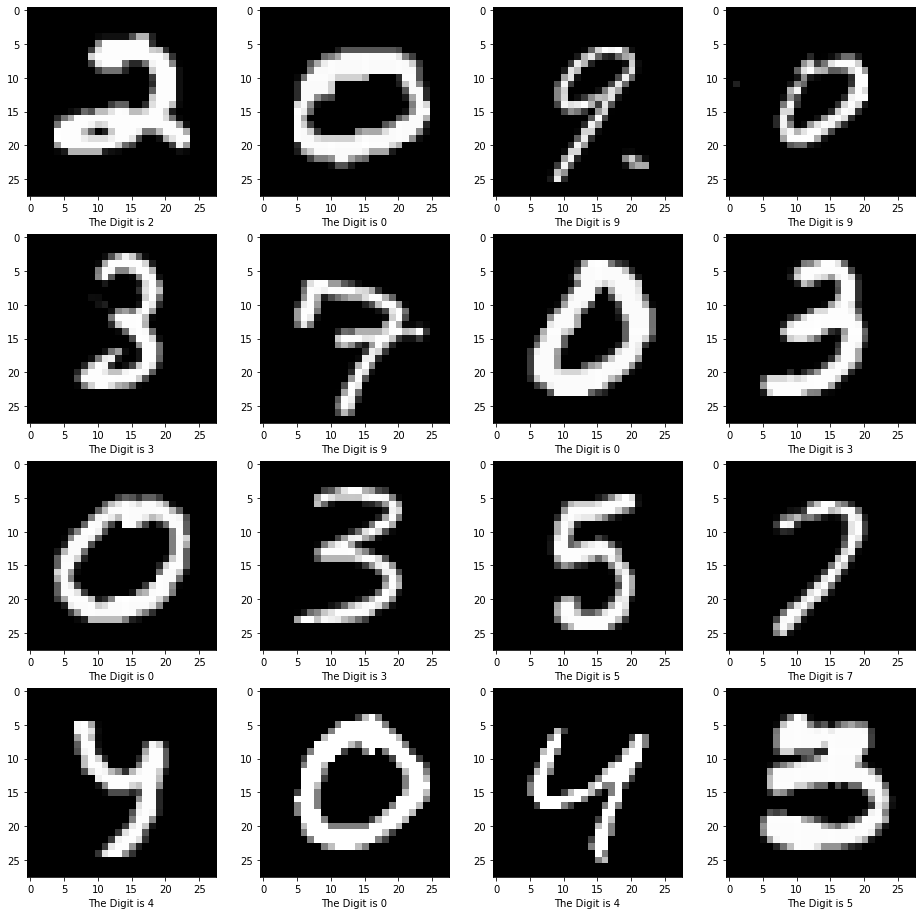

In [10]:
ncols = 4
nrows = 4
pic_index = 0
num_images = nrows*ncols 

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
 
for i in range(num_images):
    
    sp = plt.subplot(nrows, ncols, i+1)
    image = pic_index + i
    
    plt.imshow((255 - test_data[image]).reshape((28,28)), cmap='binary')
    plt.xlabel("The Digit is " + str(predictions[image]))
    
plt.show()